Choose a datasets: 
 1 -> AMOCO_HN 
 2 -> provaADM1 
 3 -> bsm2 
 4 -> matlab 
 5 -> thoni
Data are from: thoni_2
      S1in  S2in  Cin  Nin      XTin       Qin  gammaSin      xWin
time                                                              
1        1     1    1    1  0.997809  0.992650  0.981511  0.886041
2        1     1    1    1  0.995618  0.985300  0.962659  0.770382
3        1     1    1    1  0.995618  0.985300  0.962659  0.770382
4        1     1    1    1  0.995618  0.985300  0.962659  0.770382
5        1     1    1    1  0.995618  0.985300  0.962659  0.770382
6        1     1    1    1  0.996835  0.988975  0.972131  0.828427
7        1     1    1    1  0.996835  0.988975  0.972131  0.828427
8        1     1    1    1  1.000000  1.000000  1.000000  1.000000
9        1     1    1    1  1.000000  1.000735  1.001829  1.011304
10       1     1    1    1  1.000974  1.004410  1.010923  1.067575
11       1     1    1    1  1.000974  1.004410  1.010923  1.067575
12       1     

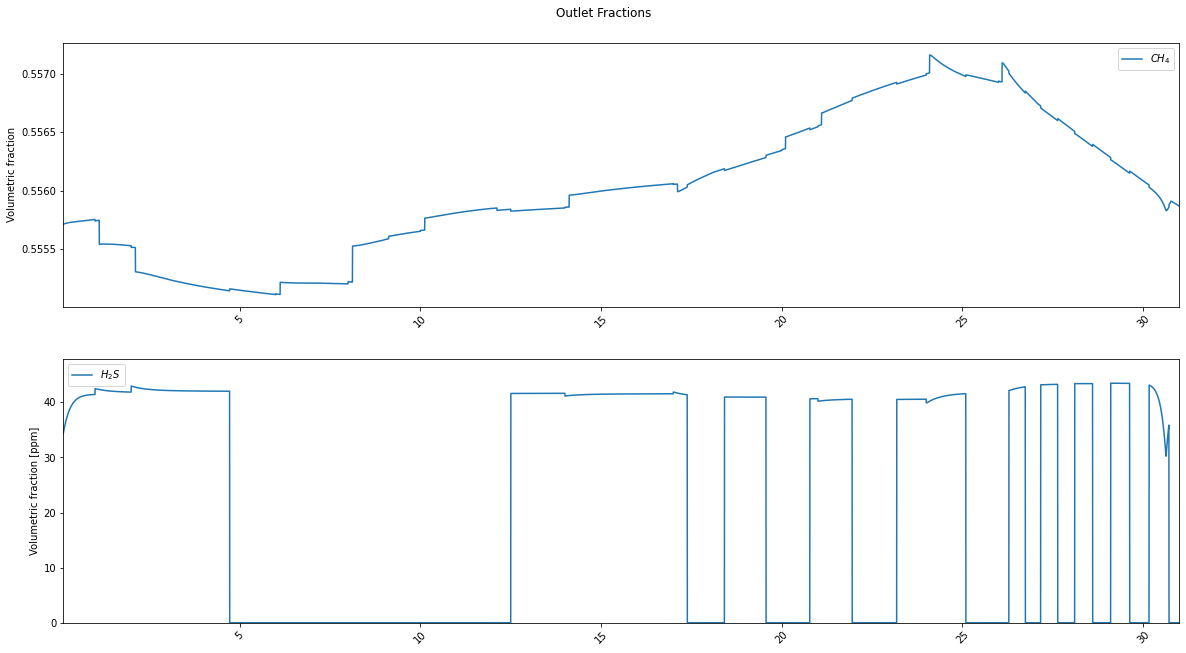

In [1]:
from main_7 import *

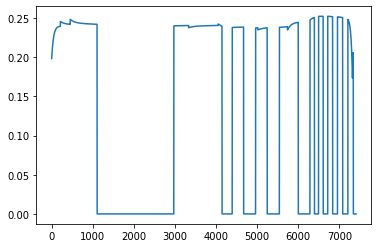

In [2]:


RC = 1.8                                                      # [gS/gO2]     - Stoichiometry of the reaction
alfa = 1                                                        # [-] - Power for sulfur concentration
beta = 0.9                                                    # [-] - Power for oxygen concentration
k_SOB = 0.8                                                     # [1/m3/h*(gS*gO)^proper exp] - Reaction rate constant
r_vett = np.zeros(len(t_span))                                  # [mg/L/min] - Reaction rate
S_vett = np.zeros((len(t_span),4))                              # [mg/L] - Sulfur concentration

V_gas = ((V_reactor - V_liq) + V_headspace)

tau_headspace = V_gas/Q_V.sum(1)                            # [h] - Time to fill the headspace

Q_in_air = 10 # [m3/h] - Air flow rate
Q_in_O2 = Q_in_air*0.21 # [m3/h] - Oxygen flow rate
Q_in_N2 = Q_in_air*0.79 # [m3/h] - Nitrogen flow rate
N_in_O2 = Q_in_O2/Rgas_m3_atm_K/(T_norm+273.15)*P_norm*np.ones(len(N_V)) # [mol/h] - Oxygen molar flow rate
N_in_N2 = Q_in_N2/Rgas_m3_atm_K/(T_norm+273.15)*P_norm*np.ones(len(N_V)) # [mol/h] - Oxygen molar flow rate

#N_in_O2 = 0.5*N_V[:,2] # [mol/h] - Oxygen Flow with respect to sulfur flow
headspace_dict = {}
digester_out = pd.DataFrame()

for ind in range(len(t_span)):
    t_cstr = np.arange(0,tau_headspace[ind],hours)
    while ind < (len(t_span)-len(t_cstr)):                
        N, r = headspace_dynamics_discr(N_V[ind:(ind+len(t_cstr)),:], N_in_O2[ind:(ind+len(t_cstr))], N_in_N2[ind:(ind+len(t_cstr))], P_dig, T, V_gas, t_cstr, k_SOB, RC, alfa, beta)
        headspace_dict[ind]= {'t_in': t_span[ind],'t_cstr': t_cstr, 'H2S': N['H2S'], 'H2O': N['H2O'], 'O2': N['O2'], 'SX': N['SX'], 'r_sob': r} # stores the results of the CSTR dynamics at each iteration, r [mg/L/h], N [mol/h]
        digester_out = digester_out.append(pd.DataFrame({
        't_in': t_span[ind], 't': (t_span[ind]+tau_headspace[ind]),
        'F_CH4': N_V[ind,0], 'F_CO2': N_V[ind,1], 'F_H2S': N['H2S'][-1], 'F_H2O': N['H2O'][-1], 'F_O2': N['O2'][-1], 'F_N2': N_in_N2[ind],
        'r_avg': (r.mean()*24)
        }, index=[ind]))
        break
plt.plot(digester_out['F_H2S'])

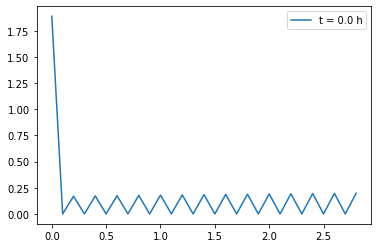

In [3]:

plt.figure()
samples = [0]
for i in samples:
    plt.plot(headspace_dict[i]['t_cstr'], headspace_dict[i]['H2S'], label = 't = %.4s h' % t_span[i])
plt.legend()


In [2]:
import pandas as pd
name = 'thoni'
influent = pd.read_csv(name + '_digester_influent_dyn.csv')
effluent = pd.read_csv(name + "_out_variables_dyn.csv")
gas = pd.read_csv(name + "_gas_flows_dyn.csv")
gas.iloc[0] = gas.iloc[1]

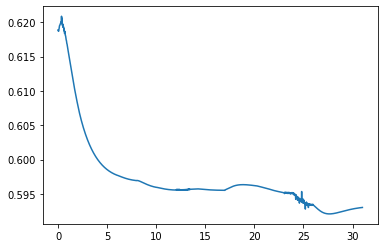

In [3]:
plt.plot(influent['time'],gas['q_ch4']/gas['q_gas'])

In [4]:
inf_flow = [290.65,	288.52,	286.38,	286.38,	286.38, 286.38,	287.45,	287.45,	290.65,	290.87,	291.93,	291.93,	291.72,	291.72,	292.79,	292.79,	292.79,	303.31,	303.31,	303.31,	304.38,	305.45,	305.45,	305.45,	284.40,	284.40,	263.36,	263.36,	263.36,	263.36,	263.36]
x_CH= [3.48663123, 3.358672011,3.228803737,3.228803737,3.228803737,3.228803737,3.293979167,3.293979167,3.48663123,3.499323773,3.562507849,3.562507849,3.54990805,3.54990805,3.61272318,3.61272318,3.61272318,3.564024356,3.564024356,3.564024356,3.624398242,3.684349875,3.684349875,3.684349875,3.793521594,3.793521594,3.920138708,3.920138708,3.920138708,3.920138708,3.920138708]
x_LI = [0.092, 0.079,0.066,0.066,0.066,0.066,0.072,0.072,0.092,0.093,0.099,0.099,0.098,0.098,0.104,0.104,0.104,0.100,0.100,0.100,0.106,0.112,0.112,0.112,0.121,0.121,0.130,0.130,0.130,0.130,0.130]
x_PR = [3.261,3.193,3.124,3.124,3.124,3.124,3.159,3.159,3.261,3.267,3.301,3.301,3.294,3.294,3.327,3.327,3.327,3.280,3.280,3.280,3.312,3.344,3.344,3.344,3.446,3.446,3.564,3.564,3.564,3.564,3.564]
x_I = [3.885,3.861,3.837,3.837,3.837,3.837,3.849,3.849,3.885,3.887,3.899,3.899,3.897,3.897,3.908,3.908,3.908,3.869,3.869,3.869,3.881,3.892,3.892,3.892,3.974,3.974,4.069,4.069,4.069,4.069,4.069]
x_XC = [34.235,34.349,34.464,34.464,34.464,34.464,34.407,34.407,34.235,34.224,34.168,34.168,34.179,34.179,34.123,34.123,34.123,34.154,34.154,34.154,34.101,34.047,34.047,34.047,33.976,33.976,33.893,33.893,33.893,33.893,33.893]
S_I = [4.652,4.665,4.678,4.678,4.678,4.678,4.671,4.671,4.652,4.651,4.644,4.644,4.646,4.646,4.639,4.639,4.639,4.646,4.646,4.646,4.640,4.634,4.634,4.634,4.619,4.619,4.603,4.603,4.603,4.603,4.603]
thoni_influent = pd.DataFrame()
thoni_influent['t'] = np.arange(1,32,1)
thoni_influent['Qtot']= inf_flow
thoni_influent['x_CH'] = x_CH
thoni_influent['x_PR'] = x_PR
thoni_influent['x_I'] = x_I
thoni_influent['x_XC'] = x_XC
thoni_influent['S_I'] = S_I
rein_O2 = [1.53565, 1.50891,1.53276,1.53558,1.50754,1.52108,1.51610,1.55465,1.58784,1.55334,1.53501,1.59526,1.55223,1.54611,1.53111,1.57026,1.55309,1.56888,1.52833,1.48249,1.42778,1.40527,1.42500,1.43030,1.45527,1.46195,1.48031, 1.44942,1.42162, 1.39806, 1.38027]
rein_CH4 = [55.5,55.6,55.9,56.6,56.7,56.6,56.0,55.8,55.4,55.1,55.1,55.2,55.4,55.2,55.3,55.0,55.3,54.5,55.7,55.7,55.8,55.4,54.9,54.0,54.2,55.0,54.3,54.4,55.7,55.4,54.4,]
rein_H2S = [42.8,49.0,62.9,59.5,64.2,64.4,76.5,75.1,70.8,73.6,70.8,72.7,76.1,75.1,68.2,76.8,69.0,61.0,41.7,33.1,24.9,30.8,39.0,36.5,30.3,34.2,36.2,28.8,29.7,34.3,43.5,]
rein = pd.DataFrame()
rein['t'] = np.arange(1,32,1)
rein['O2'] = rein_O2    # %
rein['CH4'] = rein_CH4  # %
rein['H2S'] = rein_H2S  # ppm
rein['CO2'] = 100 - rein['O2'] - rein['CH4'] - rein['H2S']/1e+4
data_thoni_avg=[60.4,60.6,60.8,61.0,61.1,61.2,60.8,60.7,61.0,61.2,61.2,61.2,61.0,60.9,61.2,61.0,61.0,60.5,61.1,61.0,60.7,60.5,60.3,59.6,59.6,60.1,59.8,59.9,60.3,59.8,59.6]
data_thoni_1 =[60.5,60.7,61.1,62.0,61.9,61.8,61.1,61.0,60.7,60.0,59.9,60.3,60.4,60.1,60.2,60.0,60.4,59.4,60.7,60.6,60.5,59.9,59.5,58.7,58.9,59.9,59.2,59.2,60.5,60.1,59.1]
H2S_thoni = [603.2,624.3,645.9,646.9,644.4,631.8,640.7,608.4,572.7,555.2,530.8,528.6,537.3,534.9,535.0,540.5,543.1,525.5,500.4,504.9,503.2,497.8,507.7,506.2,484.3,507.0,522.2,518.7,529.7,539.8,547.8]

thoni_results = pd.DataFrame()
thoni_results['t'] = np.arange(1,32,1)
thoni_results['x_CH4'] = data_thoni_avg
thoni_results['x_CH4_F1'] = data_thoni_1
thoni_results['H2S'] = H2S_thoni

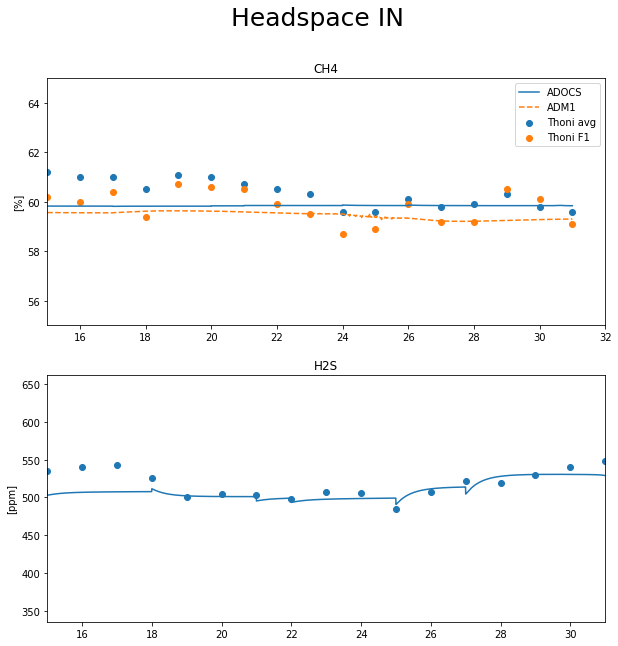

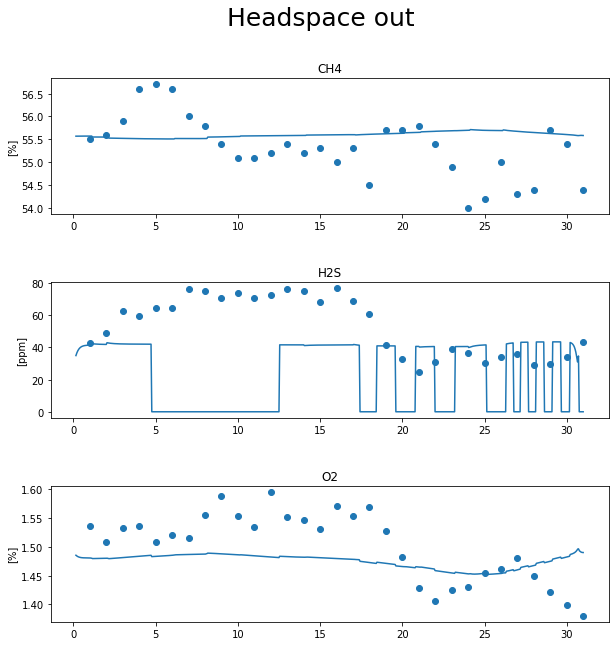

In [5]:
plt.figure(figsize=(10,10))
plt.suptitle('Headspace IN', fontsize = 25)
plt.subplot(2,1,1)
plt.title('CH4')
plt.plot(t_span_d,N_V[:,0]/(N_V.sum(axis=1))*100,label='ADOCS')
plt.plot(influent['time'],gas['q_ch4']/gas['q_gas']*100,'--',label='ADM1')
plt.scatter(thoni_results['t'],thoni_results['x_CH4'],label = 'Thoni avg')
plt.scatter(thoni_results['t'],thoni_results['x_CH4_F1'],label = 'Thoni F1')
plt.ylim(55,65)
plt.ylabel('[%]')
plt.xlim([15,32])
plt.legend()

plt.subplot(2,1,2)
plt.title('H2S')
plt.plot(t_span_d+1,N_V[:,2]/(N_V.sum(axis=1))*1e+6,label='H2S')

plt.scatter(thoni_results['t'],thoni_results['H2S'])
plt.ylabel('[ppm]')
plt.xlim([15,31])

plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Headspace out',fontsize = 25)
plt.subplot(3,1,1)
plt.title('CH4')
plt.ylabel('[%]')
plt.scatter(rein['t'],rein['CH4'])
plt.plot(digester_out['t']/24,digester_out['x_CH4'].rolling(10).mean()*100)
plt.subplot(3,1,2)
plt.title('H2S')
plt.ylabel('[ppm]')
plt.scatter(rein['t'],rein['H2S'])
plt.plot(digester_out['t']/24,digester_out['x_H2S'].rolling(10).mean()*1e+6)
plt.subplot(3,1,3)
plt.title('O2')
plt.ylabel('[%]')
plt.plot(digester_out['t']/24,digester_out['x_O2'].rolling(10).mean()*100)
plt.scatter(rein['t'],rein['O2'])

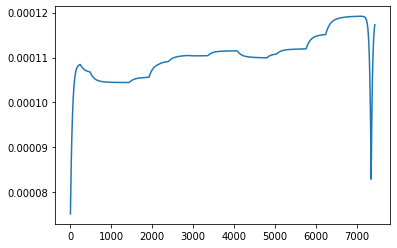

In [6]:
plt.plot(Xs)

<module 'matplotlib.pyplot' from 'C:\\Users\\fede1\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

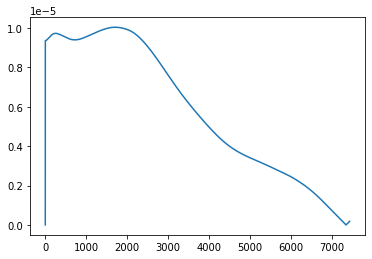

In [7]:
plt.plot(mu_srb)
plt

In [8]:
from main_7_copy import * # xW costante

***Intervals of 0.1 hours. 
 7431 time steps***
0.04 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.05 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.05 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.05 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.06 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.06 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.07 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.07 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.08 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.08 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.08 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.09 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.09 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.1 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.1 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.1 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.11 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.11 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.12 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.12 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.12 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.13 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.13 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.14 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.14 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.15 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.15 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.15 1 [1. 1. 1. 1. 1. 1. 1. 1.]
0.16 1 [1. 1. 1. 1. 1. 1. 1. 1.

KeyboardInterrupt: 

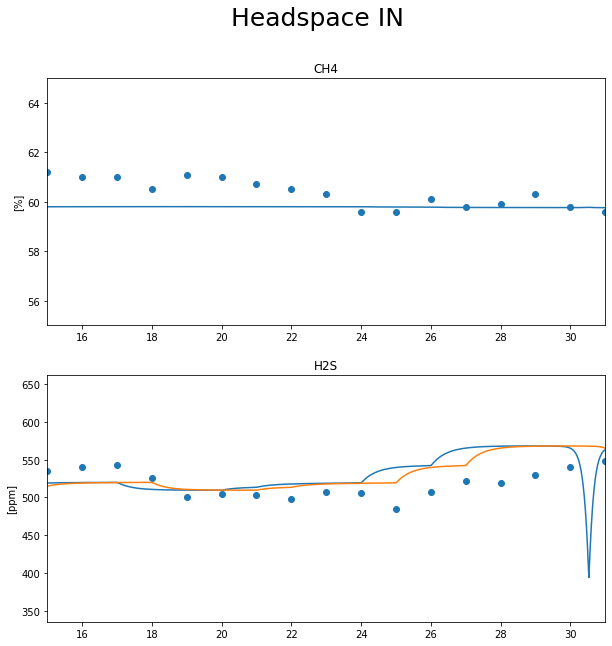

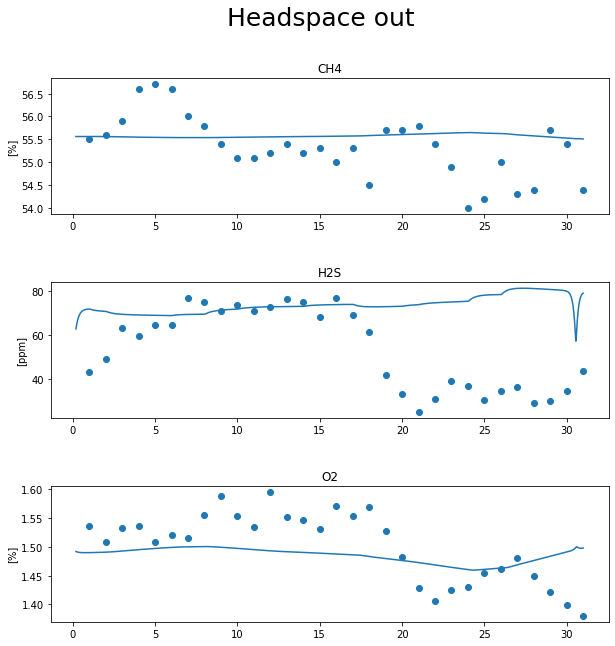

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Headspace IN', fontsize = 25)
plt.subplot(2,1,1)
plt.title('CH4')
plt.plot(t_span_d,N_V[:,0]/(N_V.sum(axis=1))*100,label='CH4')
plt.scatter(thoni_results['t'],thoni_results['x_CH4'])
plt.ylim(55,65)
plt.ylabel('[%]')
plt.xlim([15,31])

plt.subplot(2,1,2)
plt.title('H2S')
plt.plot(t_span_d,N_V[:,2]/(N_V.sum(axis=1))*1e+6,label='H2S')
plt.plot(t_span_d+1,N_V[:,2]/(N_V.sum(axis=1))*1e+6,label='H2S')
plt.scatter(thoni_results['t'],thoni_results['H2S'])
plt.ylabel('[ppm]')
plt.xlim([15,31])

plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Headspace out',fontsize = 25)
plt.subplot(3,1,1)
plt.title('CH4')
plt.ylabel('[%]')
plt.scatter(rein['t'],rein['CH4'])
plt.plot(digester_out['t']/24,digester_out['x_CH4'].rolling(10).mean()*100)
plt.subplot(3,1,2)
plt.title('H2S')
plt.ylabel('[ppm]')
plt.scatter(rein['t'],rein['H2S'])
plt.plot(digester_out['t']/24,digester_out['x_H2S'].rolling(10).mean()*1e+6)
plt.subplot(3,1,3)
plt.title('O2')
plt.ylabel('[%]')
plt.plot(digester_out['t']/24,digester_out['x_O2'].rolling(10).mean()*100)
plt.scatter(rein['t'],rein['O2'])

In [ ]:
#from main_7_copy2 import* # D changes inside the model


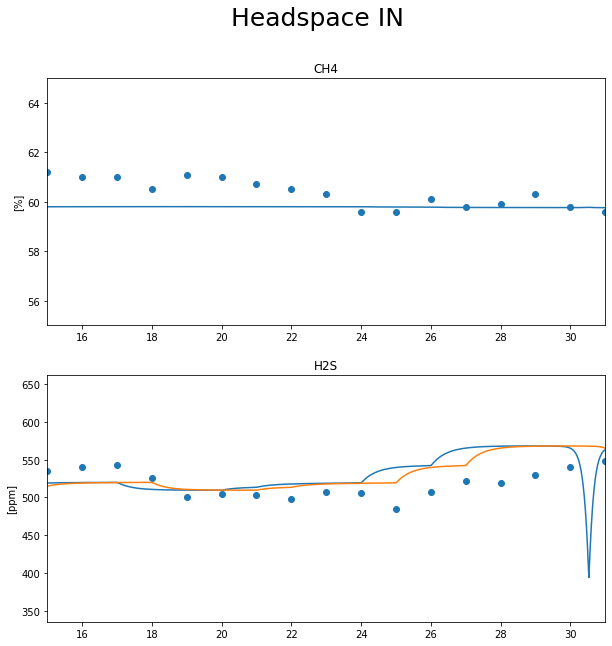

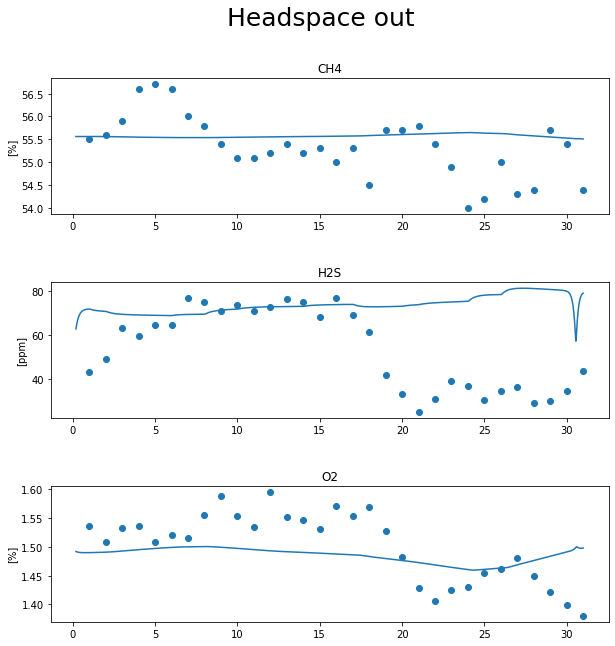

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Headspace IN', fontsize = 25)
plt.subplot(2,1,1)
plt.title('CH4')
plt.plot(t_span_d,N_V[:,0]/(N_V.sum(axis=1))*100,label='CH4')
plt.scatter(thoni_results['t'],thoni_results['x_CH4'])
plt.ylim(55,65)
plt.ylabel('[%]')
plt.xlim([15,31])

plt.subplot(2,1,2)
plt.title('H2S')
plt.plot(t_span_d,N_V[:,2]/(N_V.sum(axis=1))*1e+6,label='H2S')
plt.plot(t_span_d+1,N_V[:,2]/(N_V.sum(axis=1))*1e+6,label='H2S')
plt.scatter(thoni_results['t'],thoni_results['H2S'])
plt.ylabel('[ppm]')
plt.xlim([15,31])

plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Headspace out',fontsize = 25)
plt.subplot(3,1,1)
plt.title('CH4')
plt.ylabel('[%]')
plt.scatter(rein['t'],rein['CH4'])
plt.plot(digester_out['t']/24,digester_out['x_CH4'].rolling(10).mean()*100)
plt.subplot(3,1,2)
plt.title('H2S')
plt.ylabel('[ppm]')
plt.scatter(rein['t'],rein['H2S'])
plt.plot(digester_out['t']/24,digester_out['x_H2S'].rolling(10).mean()*1e+6)
plt.subplot(3,1,3)
plt.title('O2')
plt.ylabel('[%]')
plt.plot(digester_out['t']/24,digester_out['x_O2'].rolling(10).mean()*100)
plt.scatter(rein['t'],rein['O2'])

In [ ]:
# # Get results
# XT = YOUT_pre[:,0]              # [gCOD/L] - Particulate 
# X1 = YOUT_pre[:,1]              # [g/L]    - Acidogenics  Bacteria  
# X2 = YOUT_pre[:,2]              # [g/L]    - Methanogenic Bacteria
# Z  = YOUT_pre[:,3]              # [mmol/L] - Total Alkalinity
# S1 = YOUT_pre[:,4]              # [g/L]    - Organic Soluble Substrate
# S2 = YOUT_pre[:,5]              # [mmol/L] - VFA dissolved
# C  = YOUT_pre[:,6]              # [mmol/L] - Inorganic Carbon Dissolved

# print('************** AD_OCS OK *******************')

# # Solver Output: from all the variables from the ones of the ODE
# mu1 = np.empty(len(XT))
# mu2 = np.empty(len(XT))
# CO2 = np.empty(len(XT))
# B   = np.empty(len(XT))
# phi = np.empty(len(XT))
# p_C = np.empty(len(XT))
# q_C = np.empty(len(XT))
# q_M_u = np.empty(len(XT))
# pH  = np.empty(len(XT))

# for x in range(len(t_span)):
#     mu1[x] = mu_max[0]*(S1[x]/(S1[x]+Ks[0]))                     # [1/d]      - Specific Growth Rate for X1 (Monod)
#     mu2[x] = mu_max[1]*(S2[x]/(S2[x]+Ks[1]+S2[x]**2/KI2))        # [1/d]      - Specific Growth Rate for X2 (Haldane)
#     CO2[x] = C[x] + S2[x] - Z[x]                                 # [mmol/L]   - Dissolved CO2
#     B[x]   = Z[x] - S2[x]                                        # [mmol/L]   - Alkalinity
#     phi[x] = CO2[x] + KH*Pt + k[5]/kLa*mu2[x]*X2[x]
#     p_C[x]  = (phi[x] - (phi[x]**2- 4*KH*Pt*CO2[x])**0.5)/(2*KH) # [atm]      - CO2 Partial Pressure
#     q_C[x] = kLa*(CO2[x] - KH*p_C[x])                            # [mmol/L/d] - CO2 Outlet Molar Flow
#     q_M_u[x] = k[5]*mu2[x]*X2[x]                                 # [mmol/L/d] - CH4 Outlet Molar Flow
#     pH[x]  = np.real(-np.log10(Kb*CO2[x]/B[x]))                  # [-]        - System pH


(60.0, 70.0)

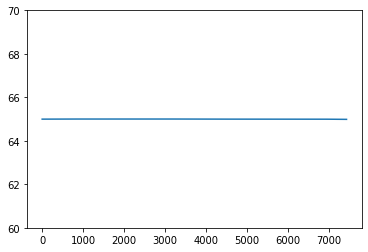

In [ ]:
plt.plot(q_M_u/(q_C+q_M_u)*100)
plt.ylim([60,70])

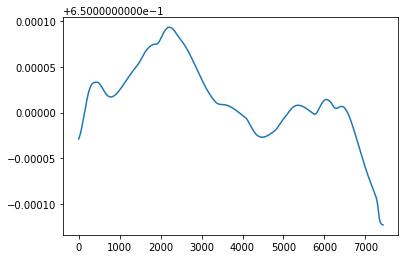

In [ ]:
plt.plot(q_M_u/(q_M_u+q_C))

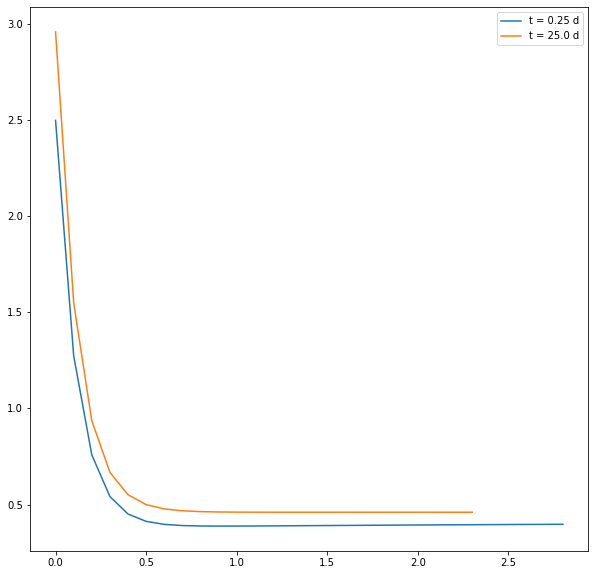

In [ ]:
plt.figure(figsize=(10,10))
samples = [50,  6000]
for i in samples:
    plt.plot(headspace_dict[i]['t_cstr'], headspace_dict[i]['H2S'], label = 't = %.4s d' % t_span_d[i])
plt.legend()


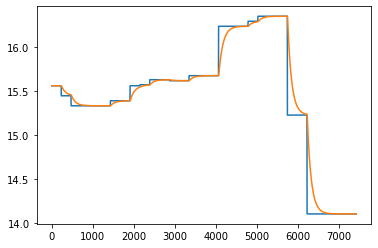

In [ ]:
plt.plot(Q_in*xW_in)
plt.plot(Q_in_real*xW_in)

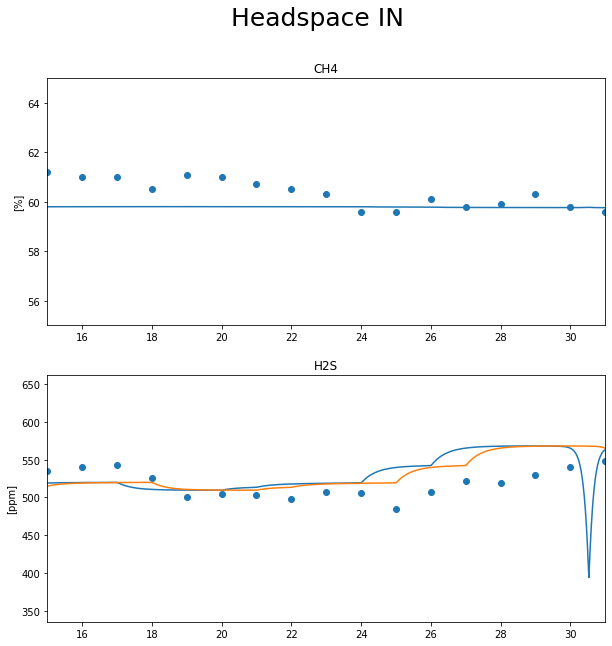

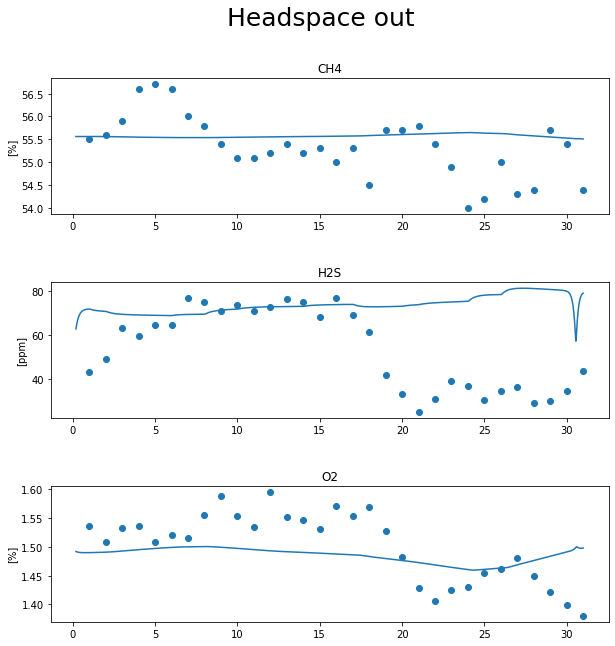

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Headspace IN', fontsize = 25)
plt.subplot(2,1,1)
plt.title('CH4')
plt.plot(t_span_d,N_V[:,0]/(N_V.sum(axis=1))*100,label='CH4')
plt.scatter(thoni_results['t'],thoni_results['x_CH4'])
plt.ylim(55,65)
plt.ylabel('[%]')
plt.xlim([15,31])

plt.subplot(2,1,2)
plt.title('H2S')
plt.plot(t_span_d,N_V[:,2]/(N_V.sum(axis=1))*1e+6,label='H2S')
plt.plot(t_span_d+1,N_V[:,2]/(N_V.sum(axis=1))*1e+6,label='H2S')
plt.scatter(thoni_results['t'],thoni_results['H2S'])
plt.ylabel('[ppm]')
plt.xlim([15,31])

plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Headspace out',fontsize = 25)
plt.subplot(3,1,1)
plt.title('CH4')
plt.ylabel('[%]')
plt.scatter(rein['t'],rein['CH4'])
plt.plot(digester_out['t']/24,digester_out['x_CH4'].rolling(10).mean()*100)
plt.subplot(3,1,2)
plt.title('H2S')
plt.ylabel('[ppm]')
plt.scatter(rein['t'],rein['H2S'])
plt.plot(digester_out['t']/24,digester_out['x_H2S'].rolling(10).mean()*1e+6)
plt.subplot(3,1,3)
plt.title('O2')
plt.ylabel('[%]')
plt.plot(digester_out['t']/24,digester_out['x_O2'].rolling(10).mean()*100)
plt.scatter(rein['t'],rein['O2'])


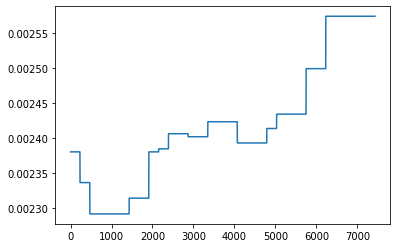

In [ ]:
plt.plot(gammaS_in)

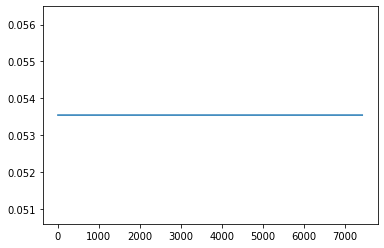

In [ ]:
plt.plot(xW_in)

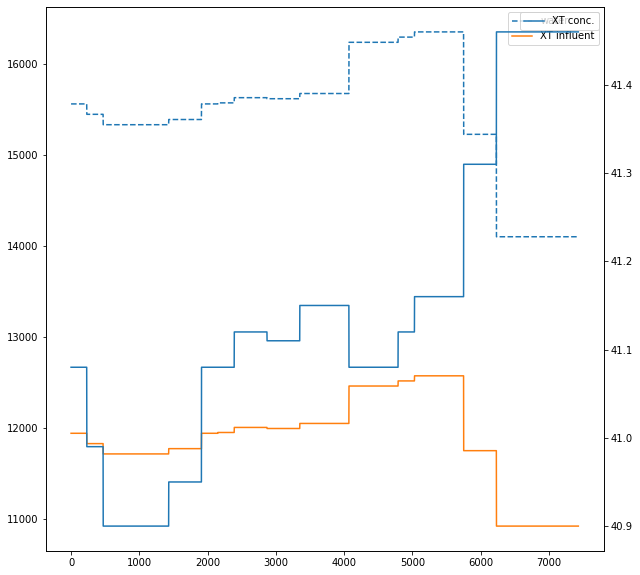

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.plot(Q_in*xW_in*1000, '--',label = 'water')
ax1.plot(y_influent_changes[:,4]*Q_in, label = 'XT influent')
plt.legend()
ax2 = ax1.twinx()
ax2.plot(y_influent_changes[:,4], label = 'XT conc.')
plt.legend(loc = 'best')

C:\Users\fede1\AppData\Local\Temp\ipykernel_20760\2032650763.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot((- X2[0] + X2)/(t_span-t_span[0]))
C:\Users\fede1\AppData\Local\Temp\ipykernel_20760\2032650763.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(abs(X2[0] - X2)/(t_span-t_span[0]))


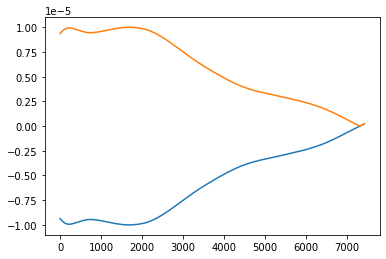

In [ ]:
plt.plot((- X2[0] + X2)/(t_span-t_span[0]))
plt.plot(abs(X2[0] - X2)/(t_span-t_span[0]))

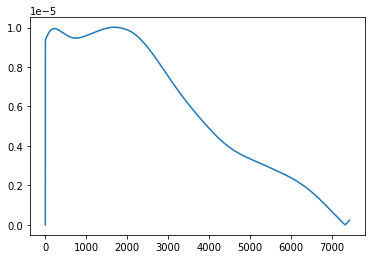

In [ ]:
plt.plot(mu_srb)

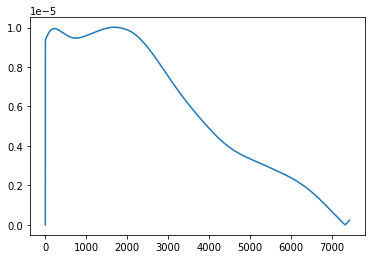

In [ ]:
plt.plot(mu_srb)

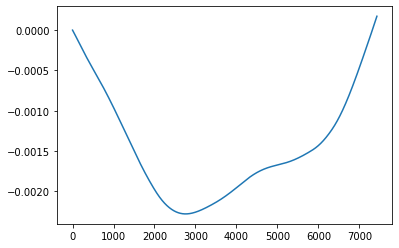

In [ ]:
plt.plot(X2-X2[0])

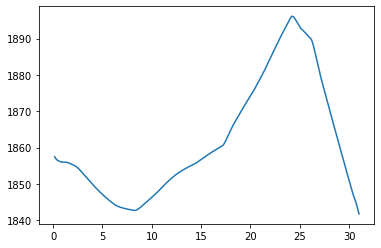

In [ ]:
plt.plot(digester_out['t']/24,digester_out['Q_CH4']*24)